Data Information of USvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40958 entries, 0 to 40957
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40958 non-null  object 
 1   trending_date           40958 non-null  object 
 2   title                   40958 non-null  object 
 3   channel_title           40958 non-null  object 
 4   category_id             40958 non-null  float64
 5   publish_time            40958 non-null  object 
 6   tags                    40958 non-null  object 
 7   views                   40958 non-null  float64
 8   likes                   40958 non-null  float64
 9   dislikes                40958 non-null  float64
 10  comment_count           40958 non-null  float64
 11  thumbnail_link          40958 non-null  object 
 12  comments_disabled       40958 non-null  bool   
 13  ratings_disabled        40958 non-null  bool   
 14  video_err

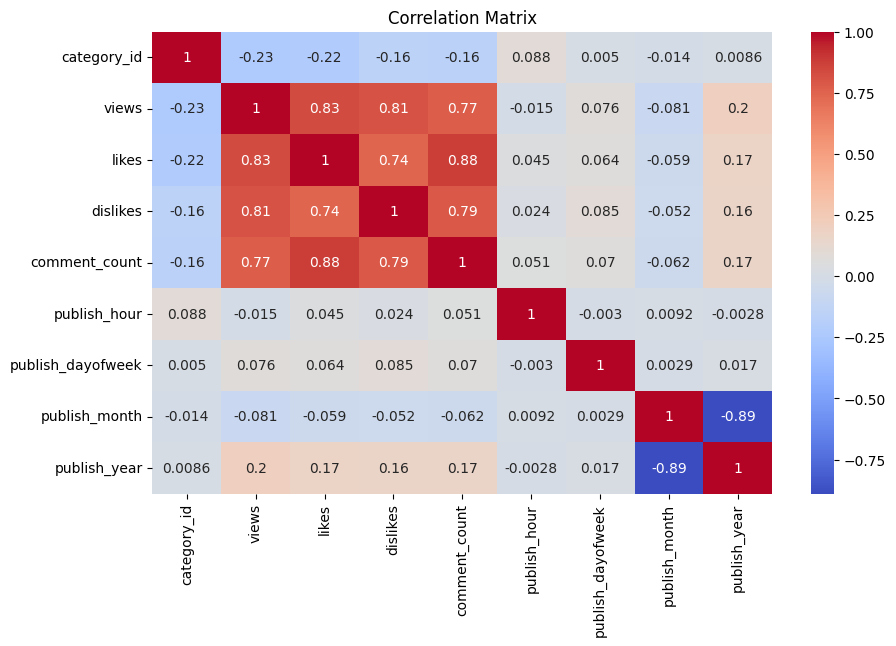

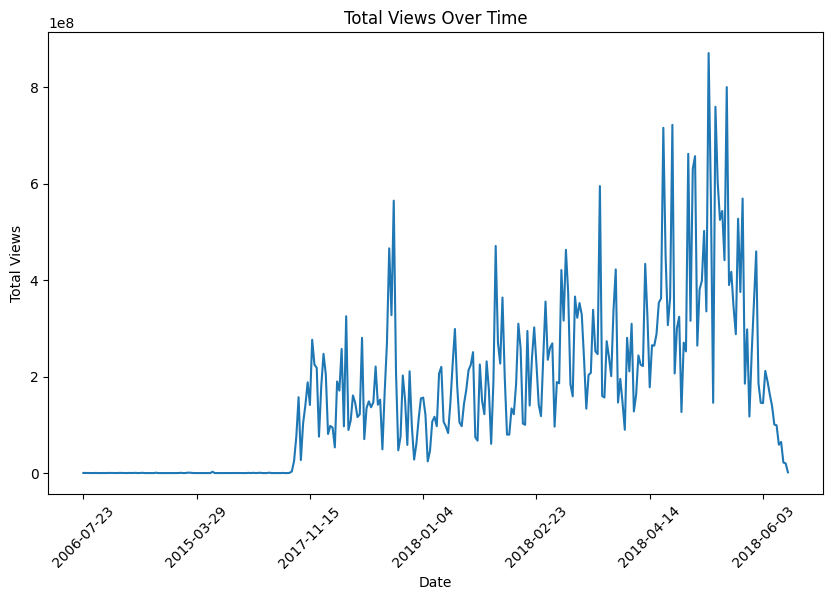

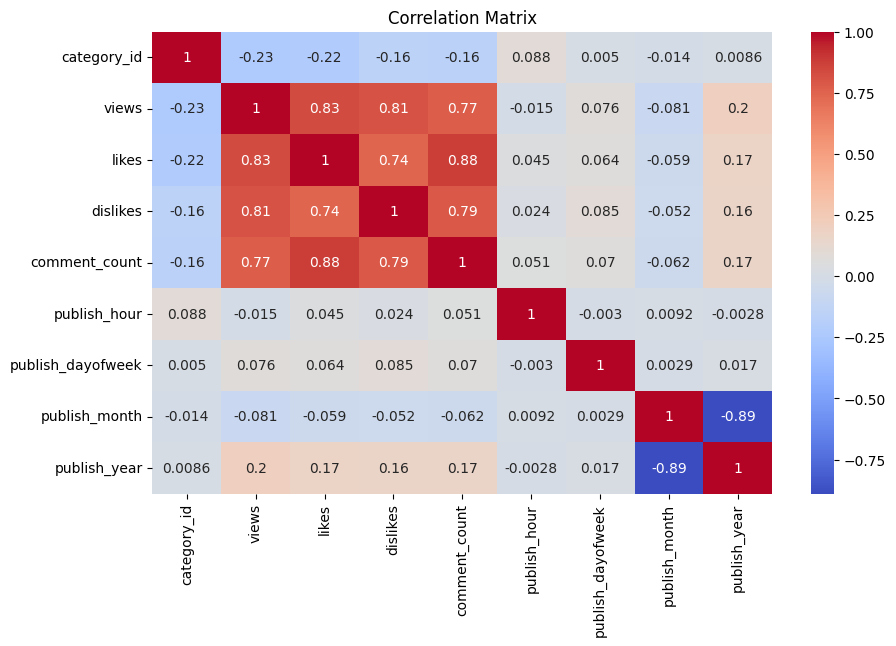

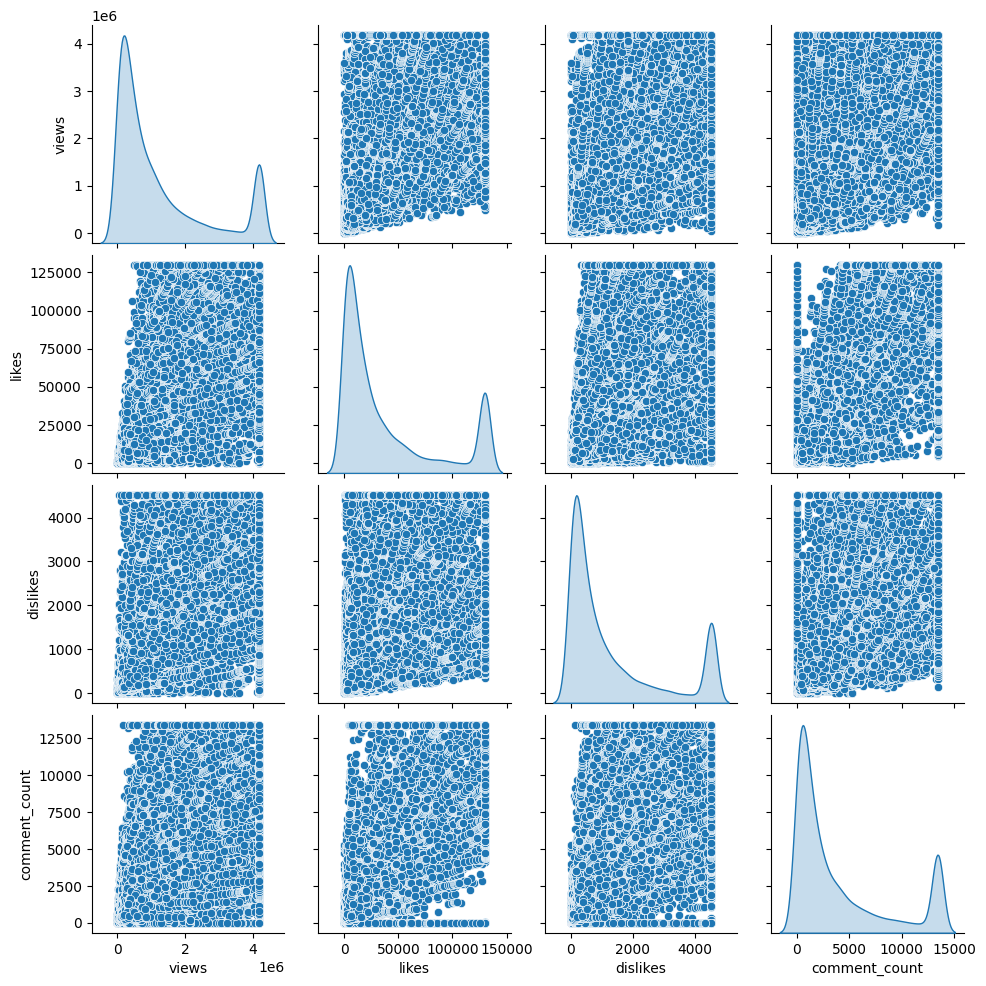


Data Cleaning Process Completed. Cleaned data saved to: /content/USvideos.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/USvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/USvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/USvideos.csv', encoding='cp1252')  # Try cp1252


# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of USvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
# data['publish_time'] = pd.to_datetime(data['publish_time'])
# data['publish_date'] = data['publish_time'].dt.date
# data['publish_hour'] = data['publish_time'].dt.hour
# data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
# data['publish_month'] = data['publish_time'].dt.month
# data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/USvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)


Data Information of FRvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40724 non-null  object
 1   trending_date           40724 non-null  object
 2   title                   40724 non-null  object
 3   channel_title           40724 non-null  object
 4   category_id             40724 non-null  int64 
 5   publish_time            40724 non-null  object
 6   tags                    40724 non-null  object
 7   views                   40724 non-null  int64 
 8   likes                   40724 non-null  int64 
 9   dislikes                40724 non-null  int64 
 10  comment_count           40724 non-null  int64 
 11  thumbnail_link          40724 non-null  object
 12  comments_disabled       40724 non-null  bool  
 13  ratings_disabled        40724 non-null  bool  
 14  video_error_or_removed  4

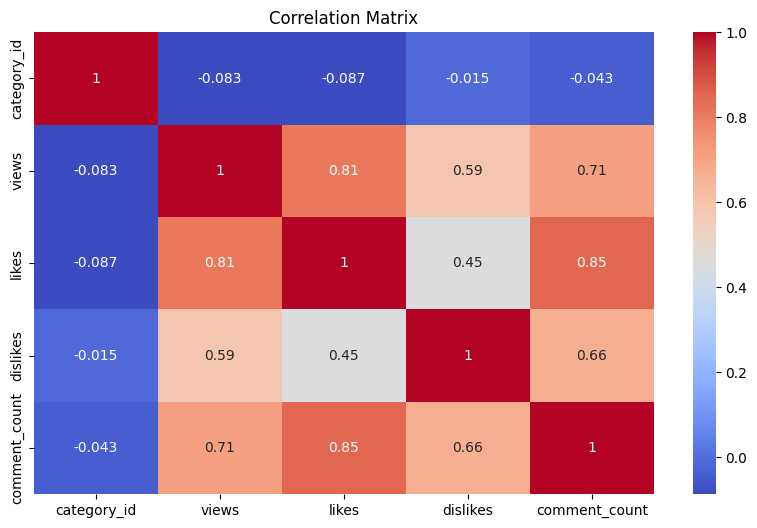

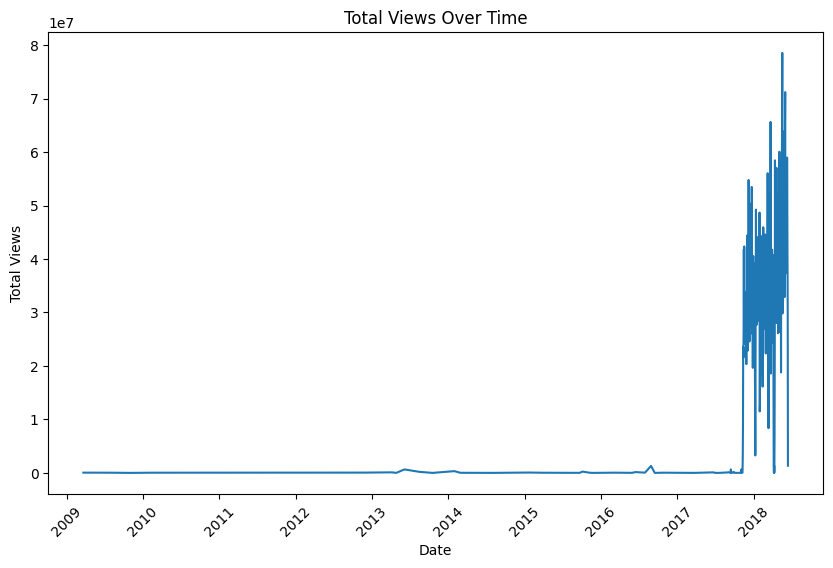

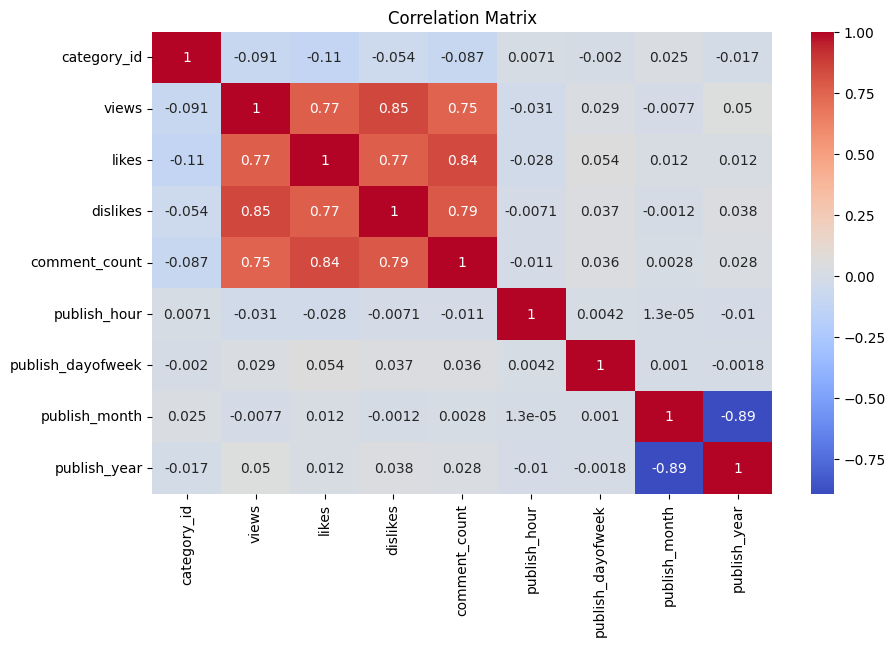

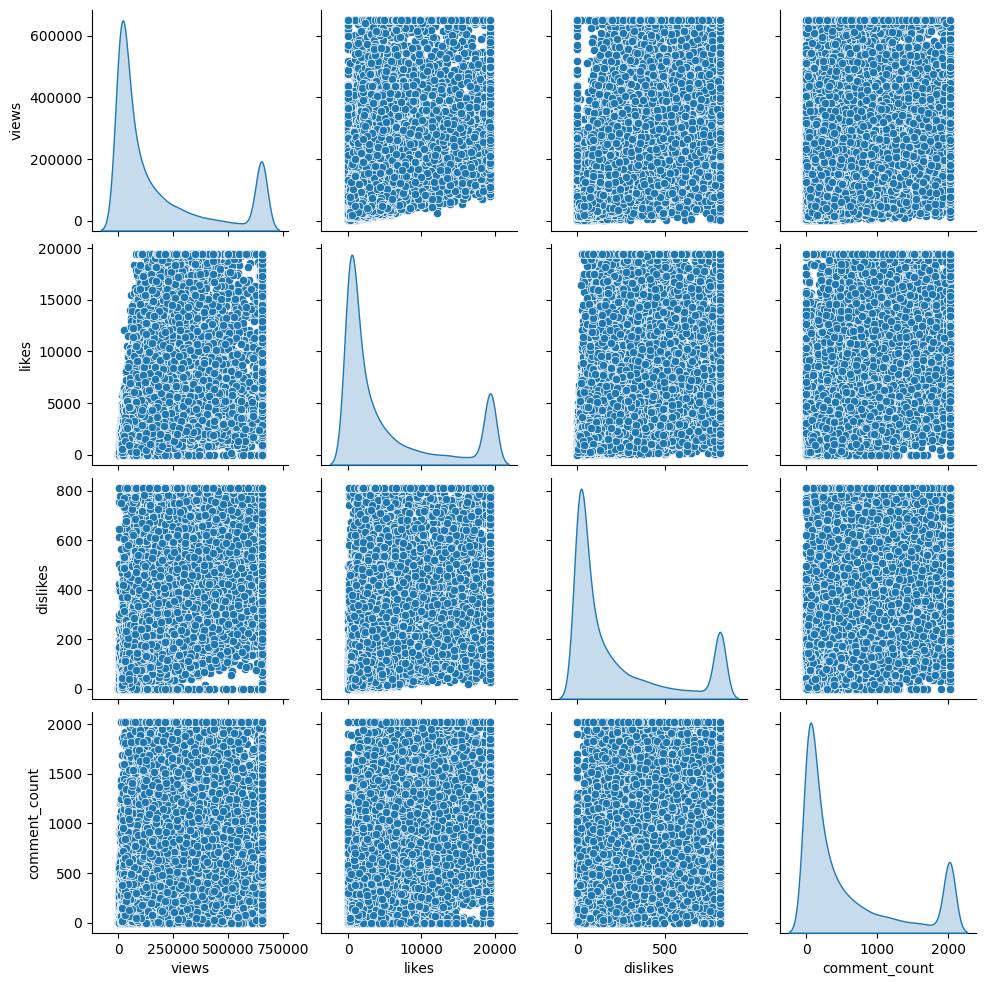


Data Cleaning Process Completed. Cleaned data saved to: /content/FRvideos.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/FRvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/FRvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/FRvideos.csv', encoding='cp1252')  # Try cp1252

# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of FRvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/FRvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)





Data Information of GBvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  3

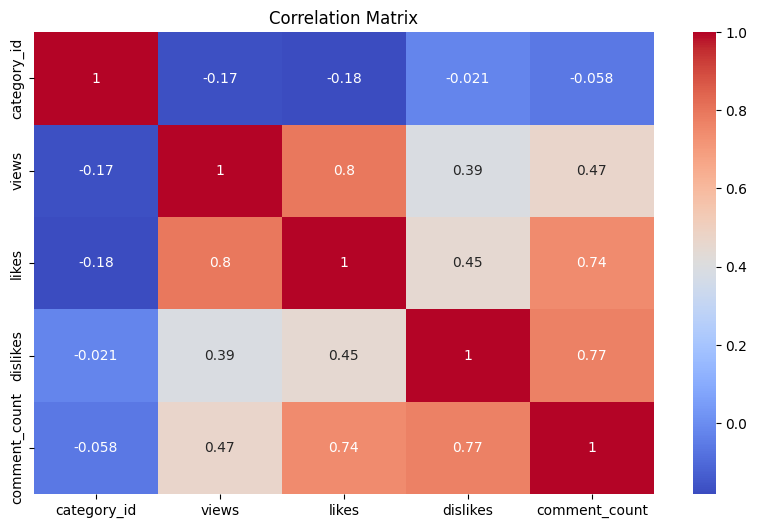

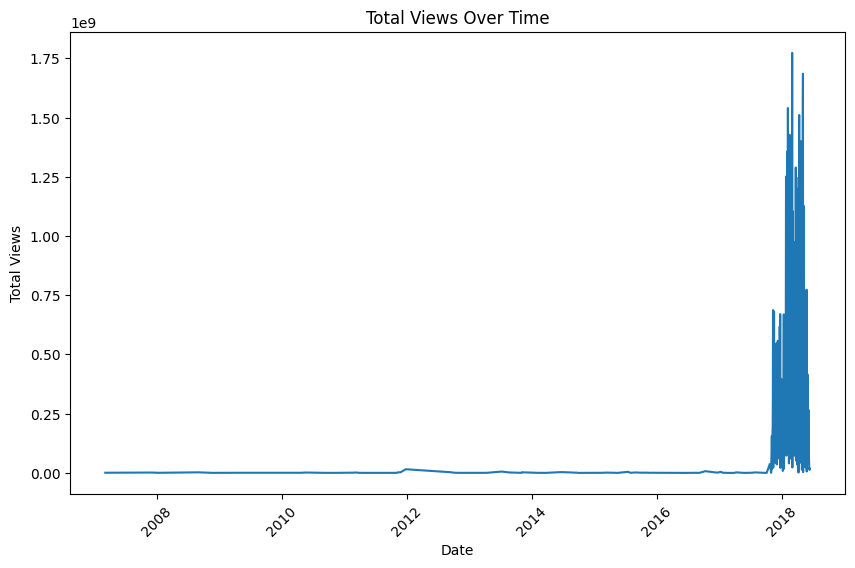

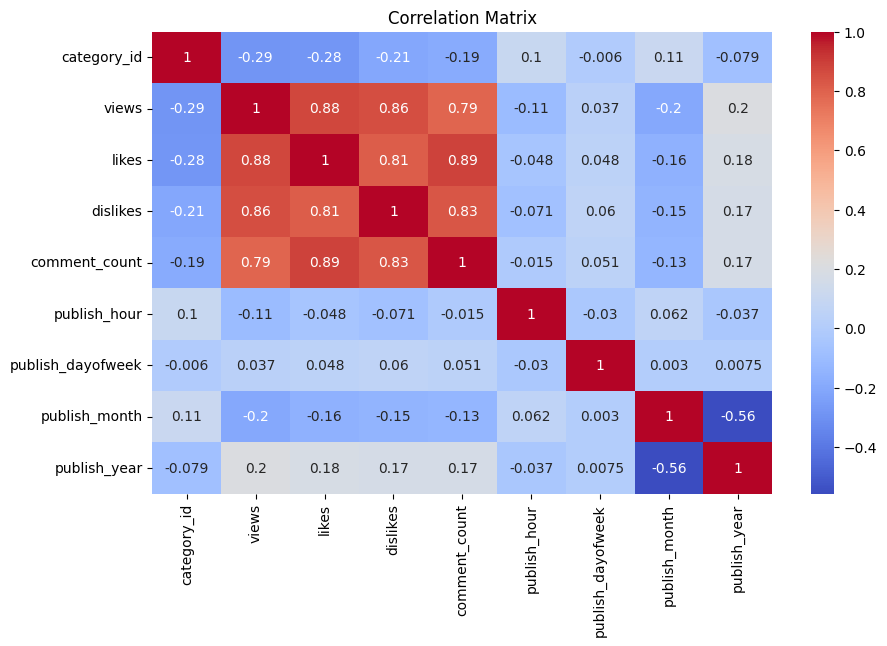

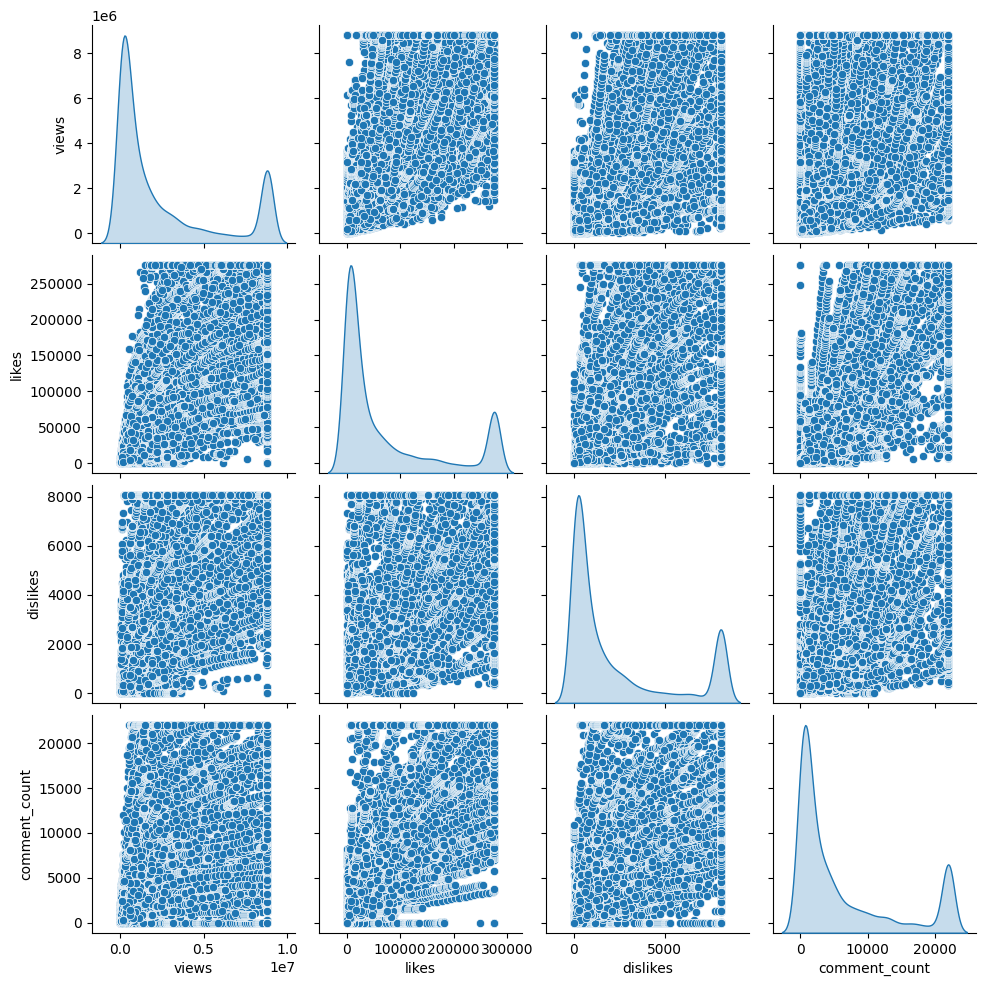


Data Cleaning Process Completed. Cleaned data saved to: /content/GBvideos.csv


In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/GBvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/GBvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/GBvideos.csv', encoding='cp1252')  # Try cp1252


# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of GBvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/GBvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)



Data Information of DEvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  4

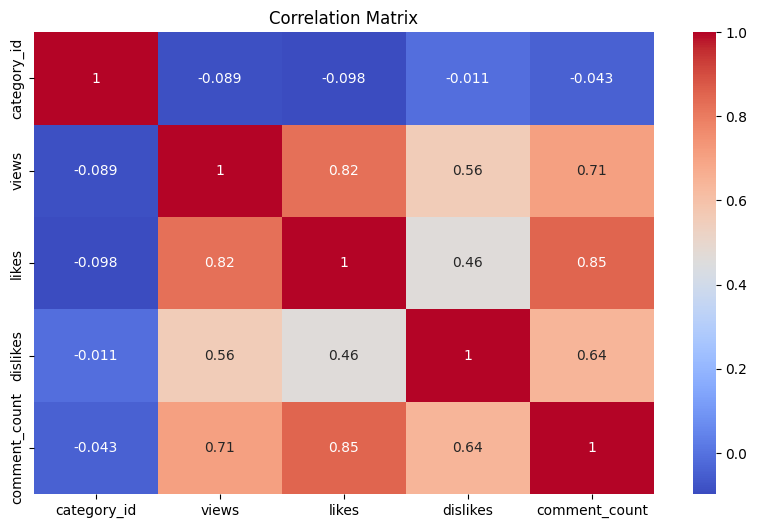

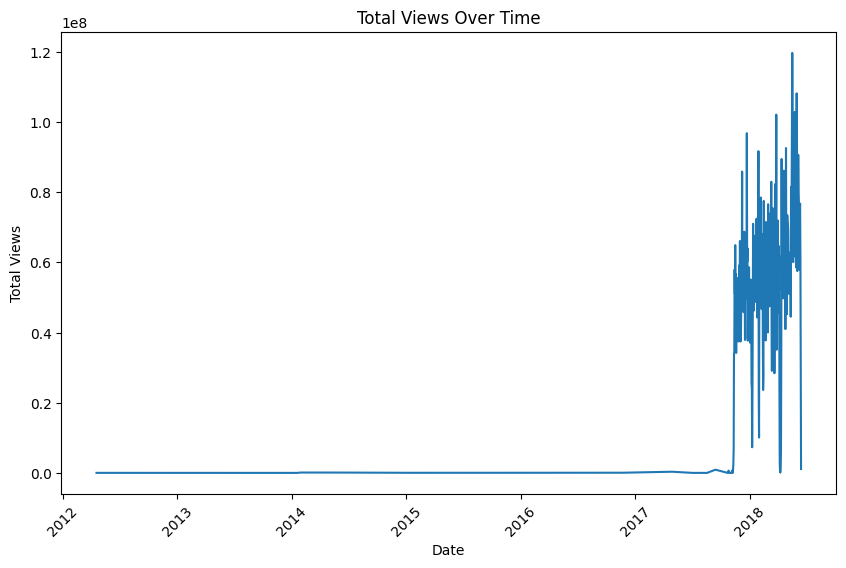

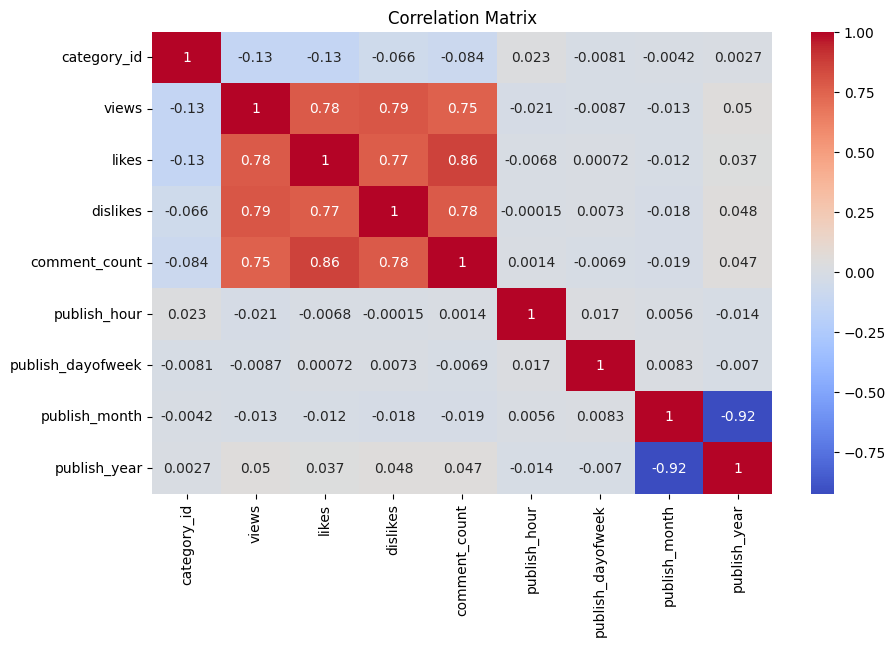

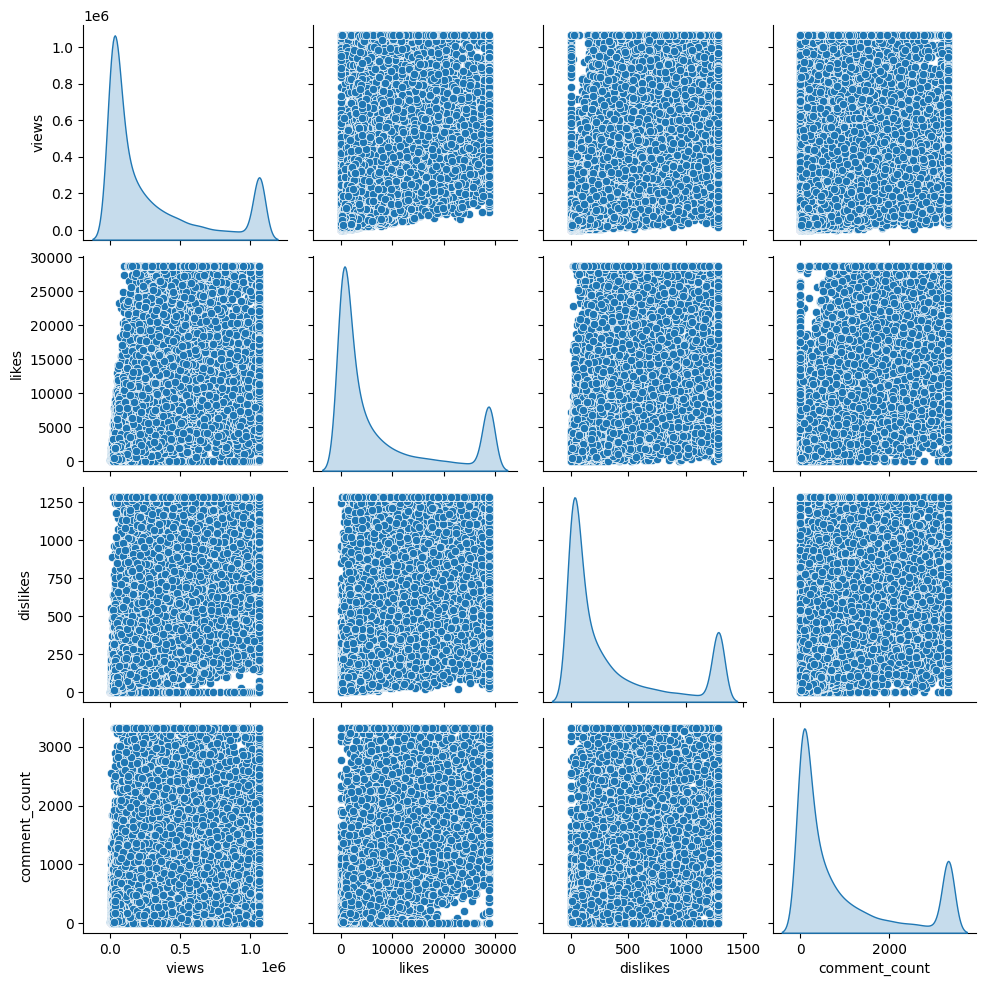


Data Cleaning Process Completed. Cleaned data saved to: /content/DEvideos.csv


In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/DEvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/DEvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/DEvideos.csv', encoding='cp1252')  # Try cp1252

# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of DEvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/DEvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)



Data Information of MXvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  4

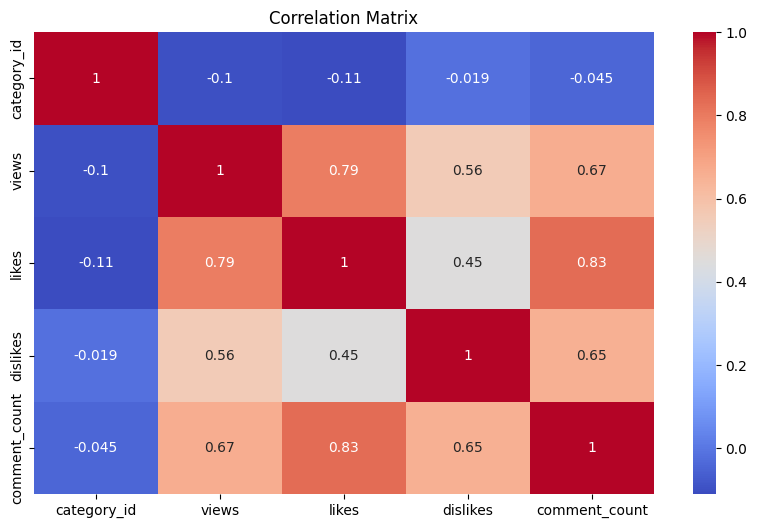

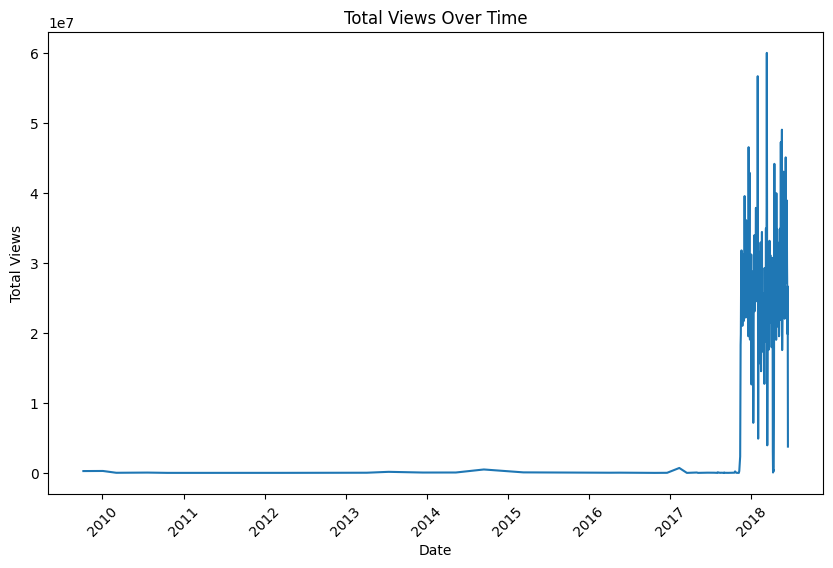

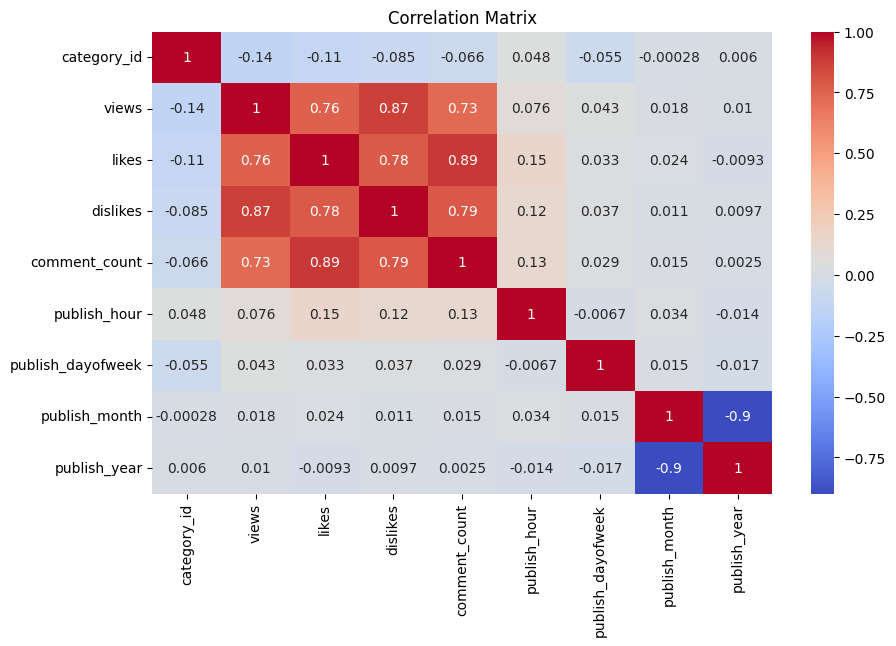

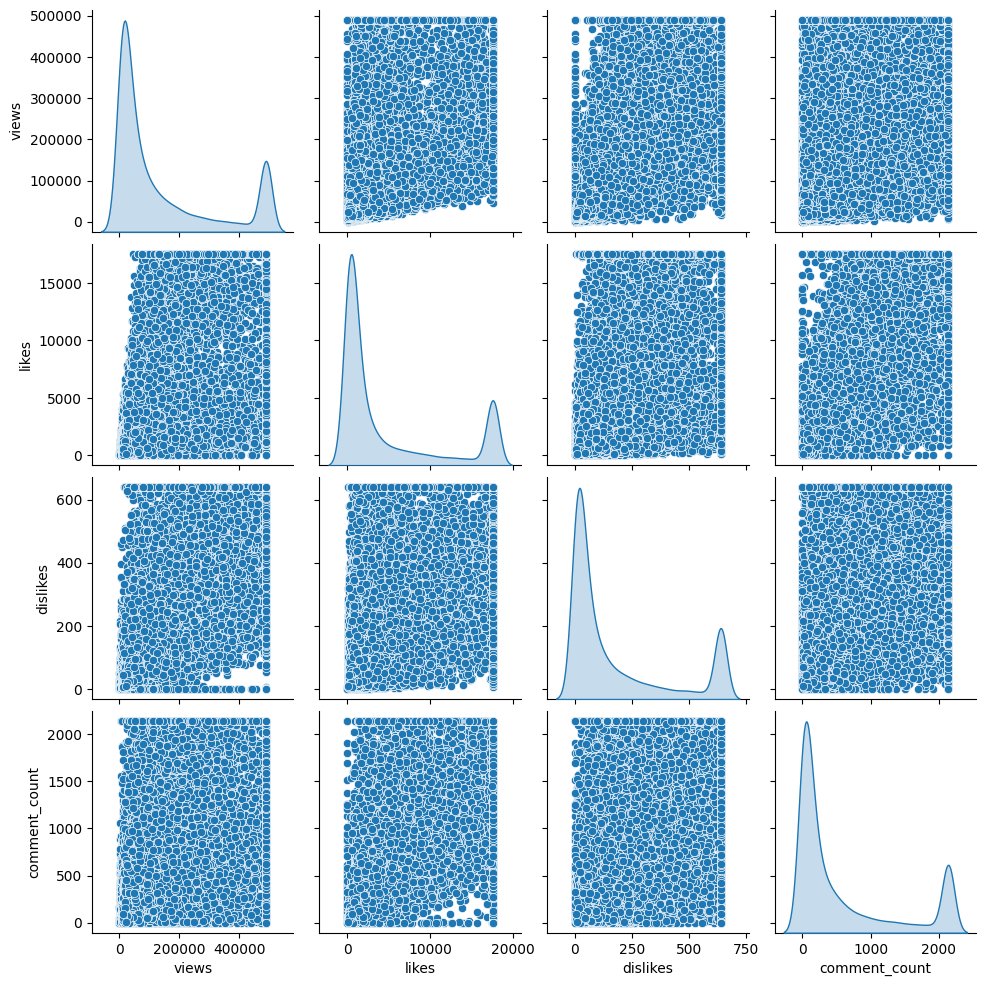


Data Cleaning Process Completed. Cleaned data saved to: /content/MXvideos.csv


In [18]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/MXvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/MXvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/MXvideos.csv', encoding='cp1252')  # Try cp1252


# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of MXvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/MXvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)



Data Information of CAvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  4

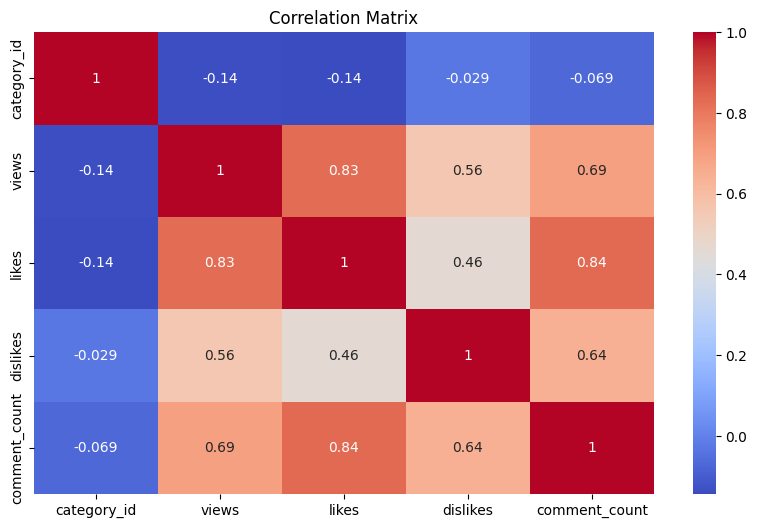

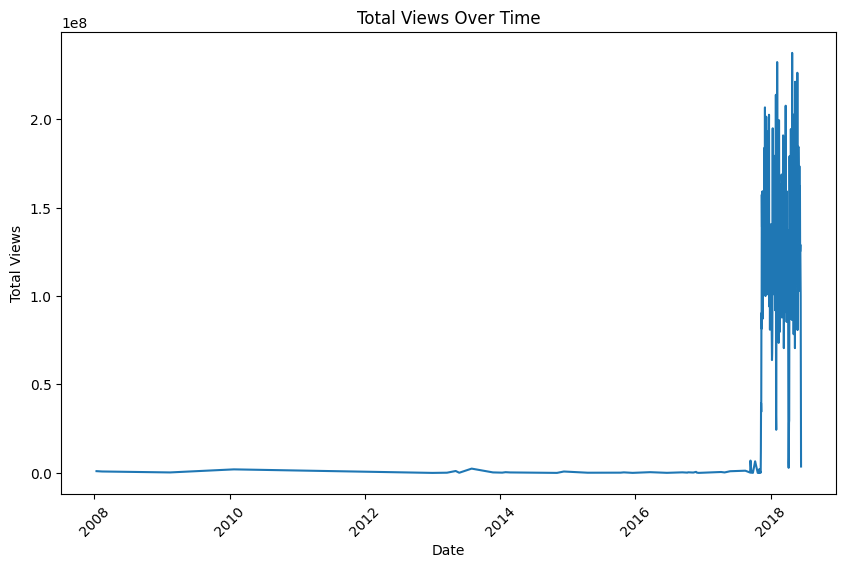

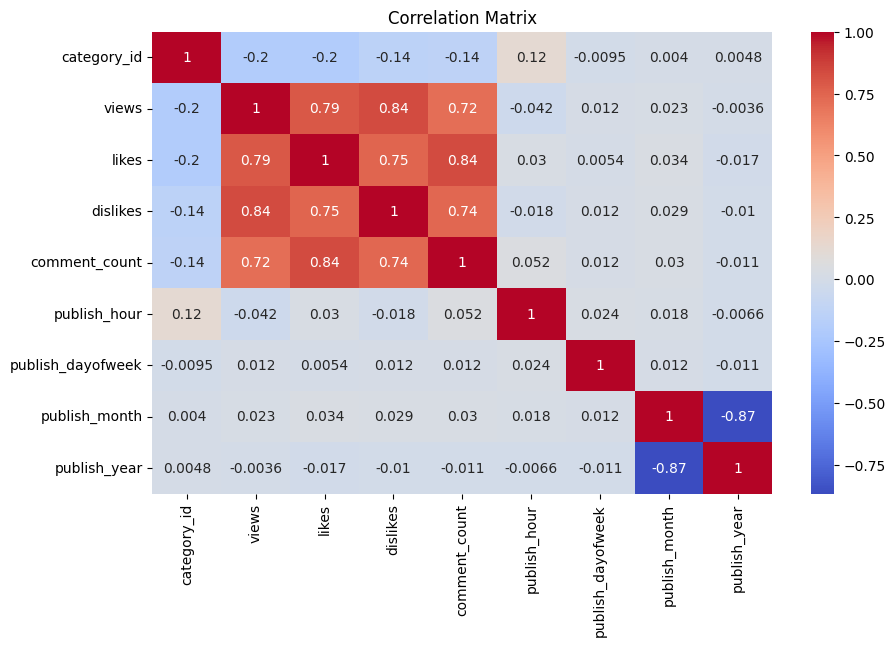

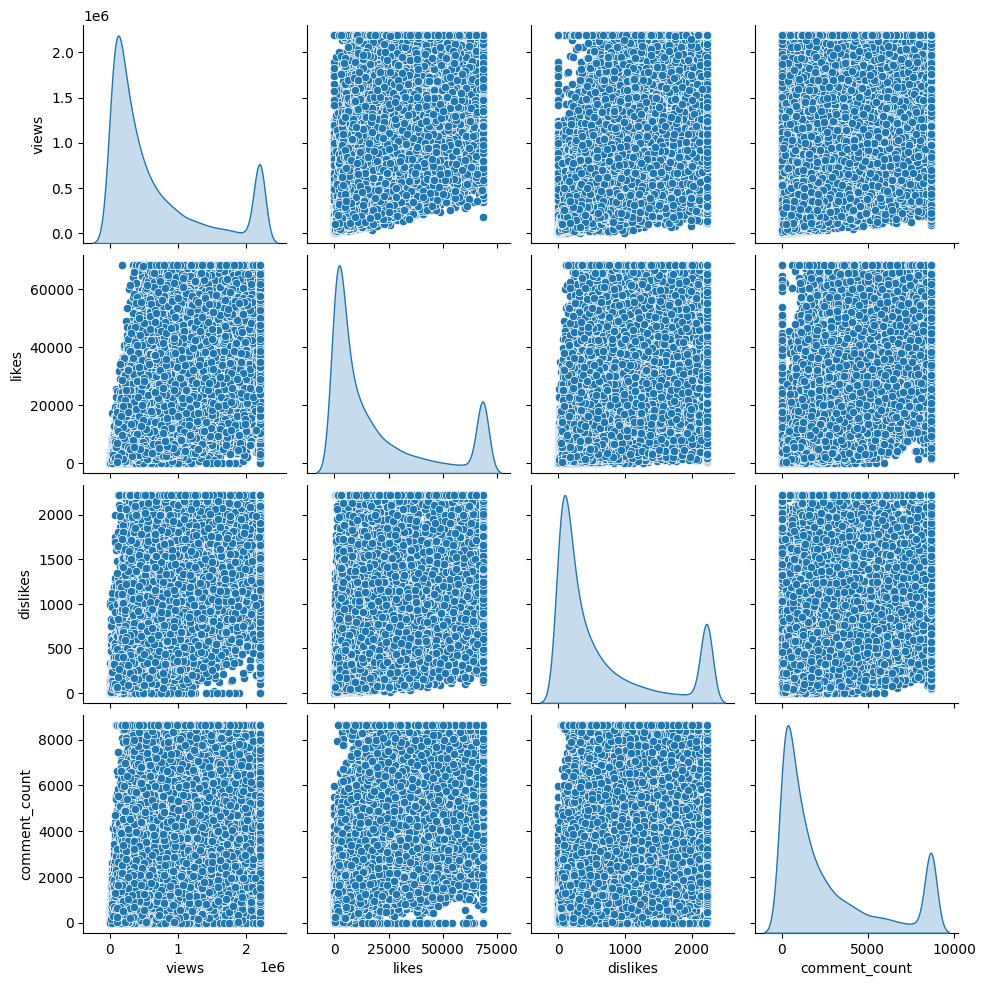


Data Cleaning Process Completed. Cleaned data saved to: /content/CAvideos.csv


In [19]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/CAvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/CAvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/CAvideos.csv', encoding='cp1252')  # Try cp1252


# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of CAvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/CAvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)




In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# file_path2 = '/content/RUvideos.csv'

# Try different encodings
try:
    data = pd.read_csv('/content/RUvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/RUvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/RUvideos.csv', encoding='cp1252')  # Try cp1252

# ... rest of your code ...

# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of RUvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/RUvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)


Data Information of INvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  3

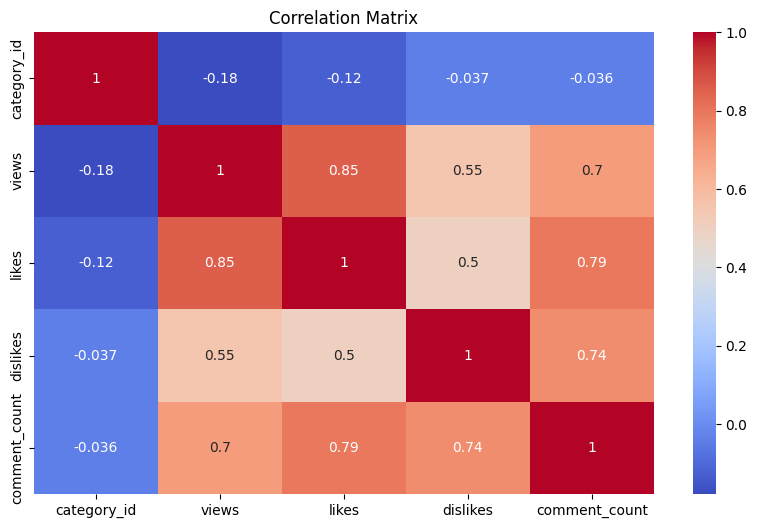

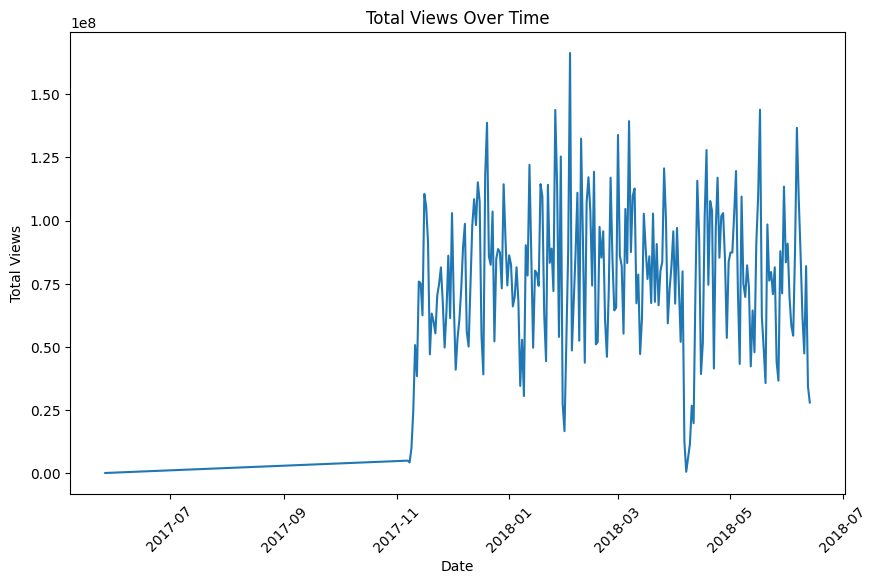

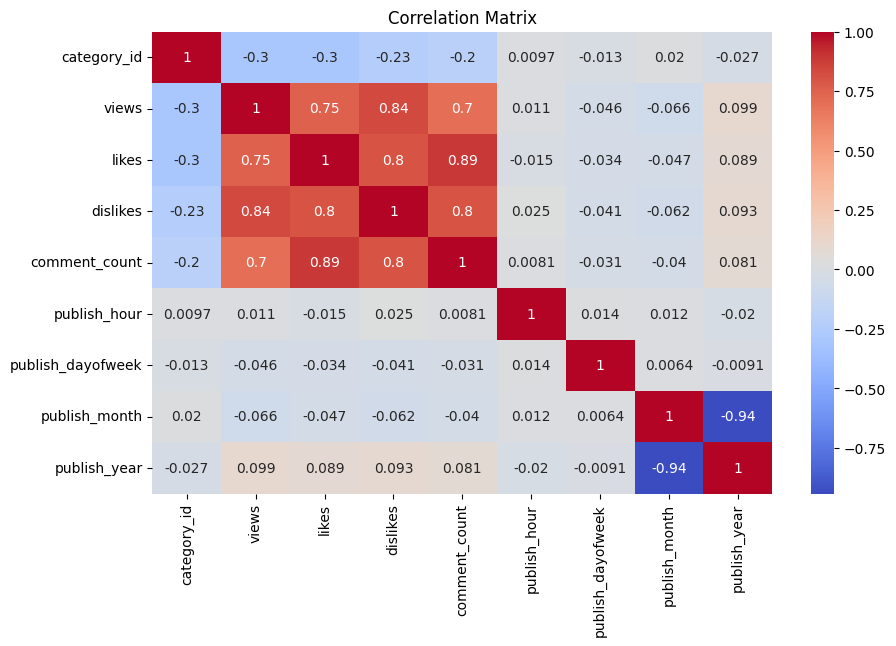

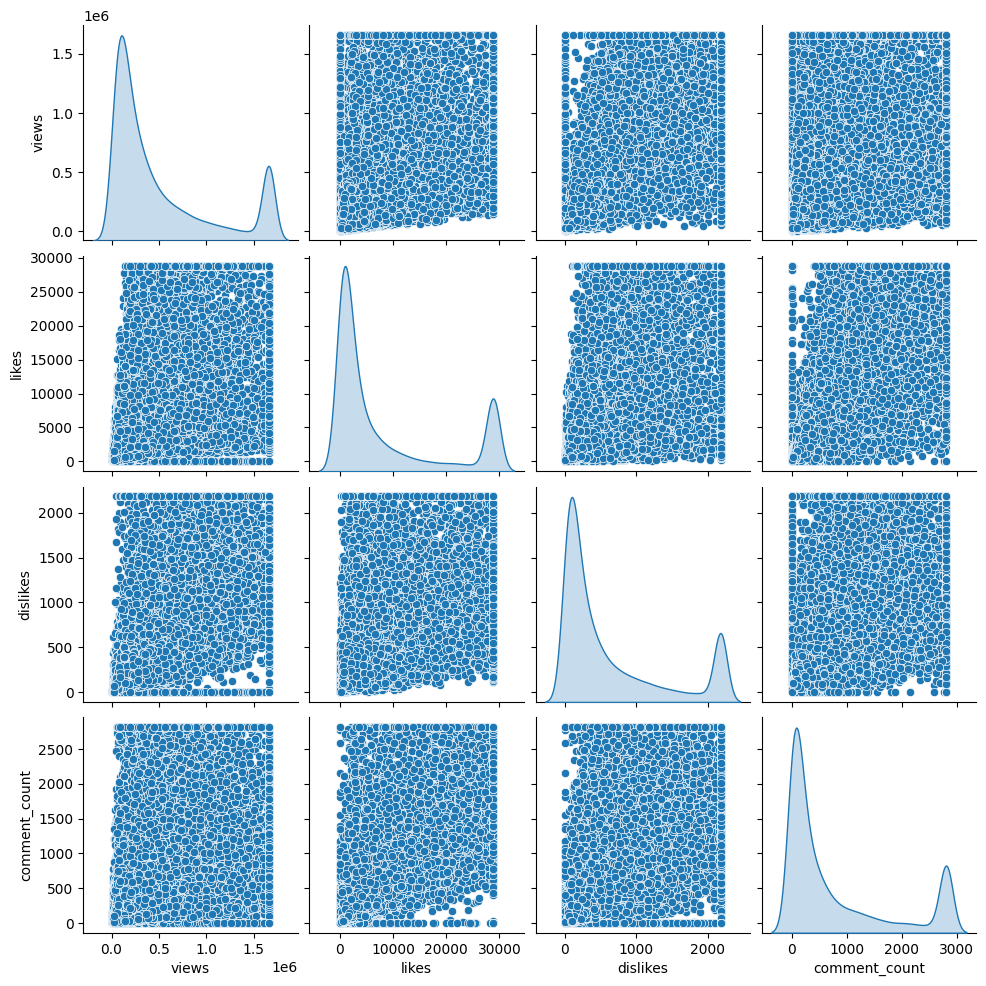


Data Cleaning Process Completed. Cleaned data saved to: /content/INvideos.csv


In [20]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/INvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/INvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/INvideos.csv', encoding='cp1252')  # Try cp1252

# ... rest of your code ...

# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of INvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/INvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)



<ipython-input-25-da819d89f358>:13: DtypeWarning: Columns (4,12,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/KRvideos.csv', encoding='latin-1')  # Try latin-1


Data Information of KRvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34494 entries, 0 to 34493
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                34493 non-null  object 
 1   trending_date           34439 non-null  object 
 2   title                   34439 non-null  object 
 3   channel_title           34439 non-null  object 
 4   category_id             34439 non-null  object 
 5   publish_time            34439 non-null  object 
 6   tags                    34428 non-null  object 
 7   views                   34427 non-null  float64
 8   likes                   34427 non-null  float64
 9   dislikes                34427 non-null  float64
 10  comment_count           34427 non-null  float64
 11  thumbnail_link          34427 non-null  object 
 12  comments_disabled       34427 non-null  object 
 13  ratings_disabled        34427 non-null  object 
 14  video_err

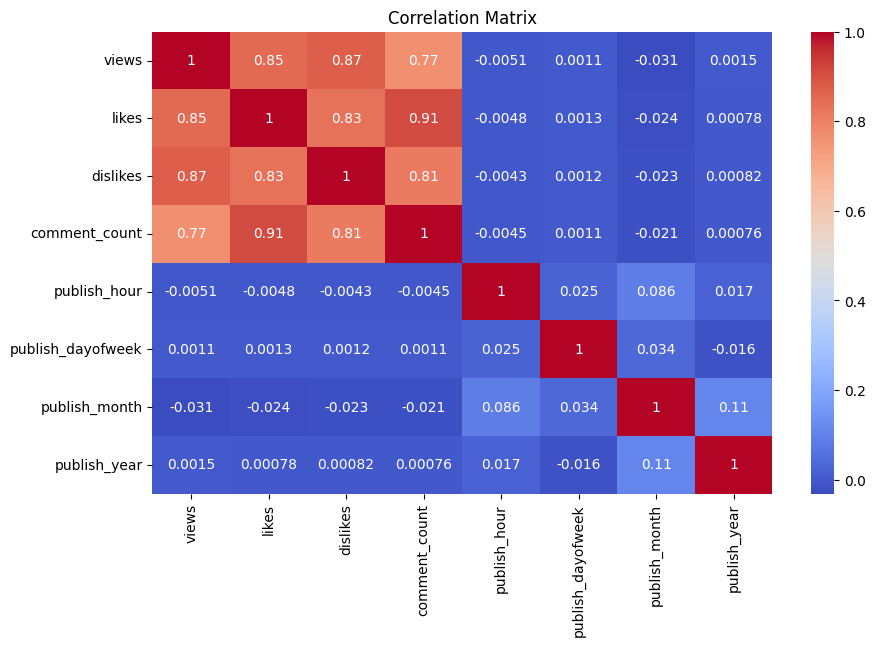

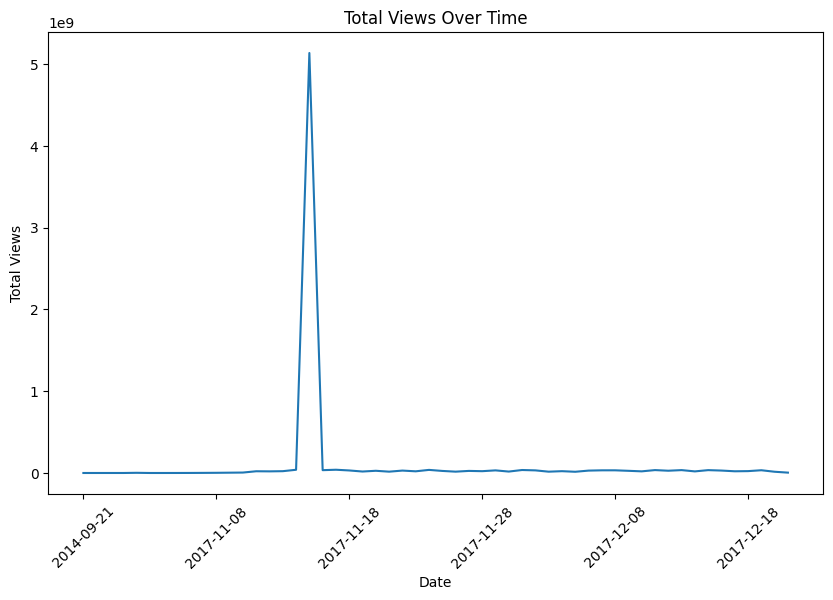

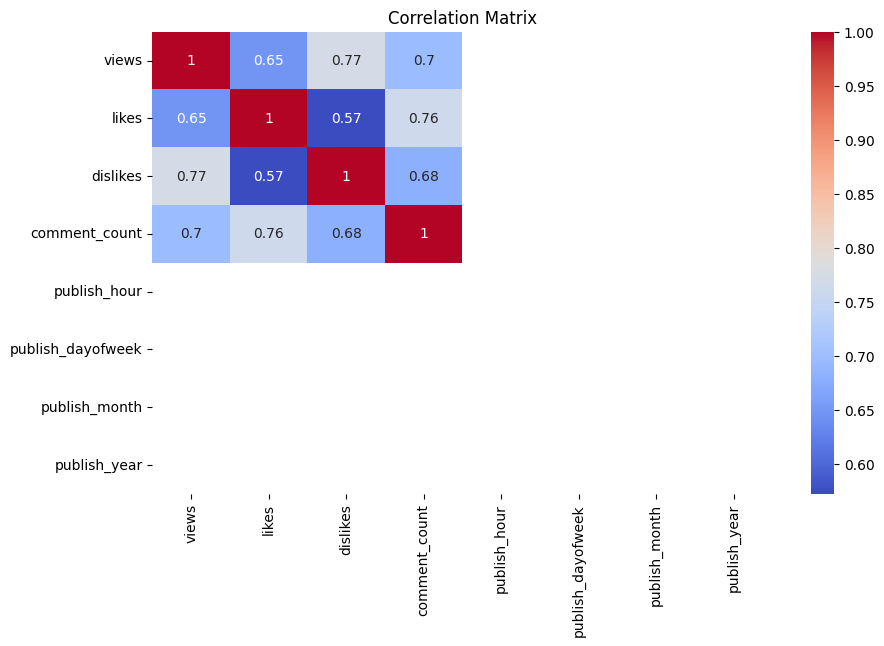

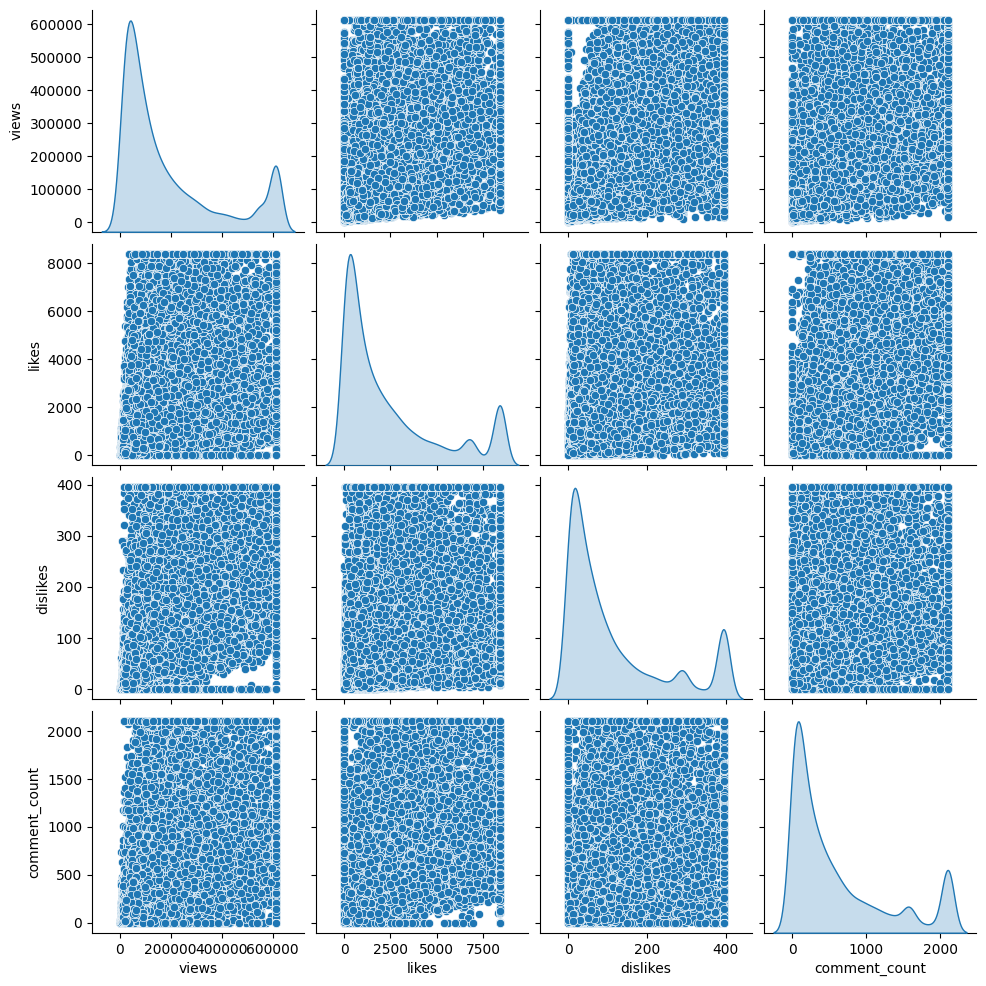


Data Cleaning Process Completed. Cleaned data saved to: /content/KRvideos.csv


In [25]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/KRvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/KRvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/KRvideos.csv', encoding='cp1252')  # Try cp1252


# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of KRvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
# data['publish_time'] = pd.to_datetime(data['publish_time'])
# data['publish_date'] = data['publish_time'].dt.date
# data['publish_hour'] = data['publish_time'].dt.hour
# data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
# data['publish_month'] = data['publish_time'].dt.month
# data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/KRvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)

Data Information of JPvideos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                20523 non-null  object
 1   trending_date           20523 non-null  object
 2   title                   20523 non-null  object
 3   channel_title           20523 non-null  object
 4   category_id             20523 non-null  int64 
 5   publish_time            20523 non-null  object
 6   tags                    20523 non-null  object
 7   views                   20523 non-null  int64 
 8   likes                   20523 non-null  int64 
 9   dislikes                20523 non-null  int64 
 10  comment_count           20523 non-null  int64 
 11  thumbnail_link          20523 non-null  object
 12  comments_disabled       20523 non-null  bool  
 13  ratings_disabled        20523 non-null  bool  
 14  video_error_or_removed  2

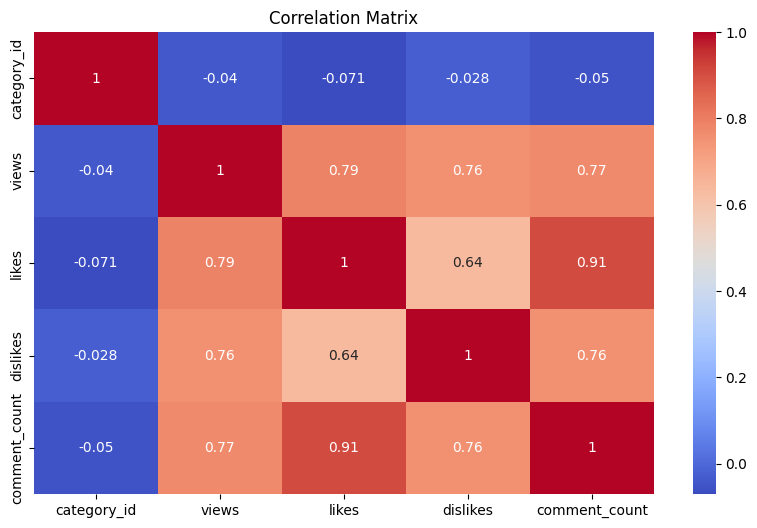

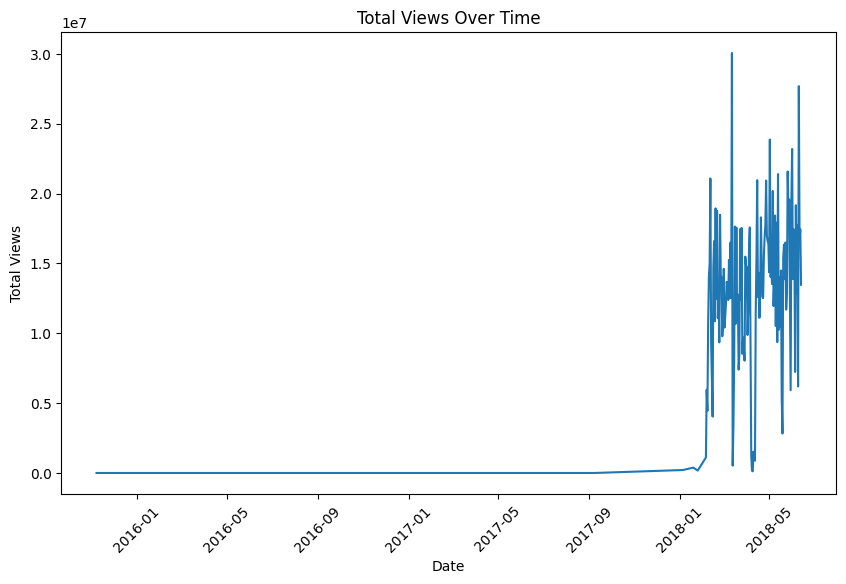

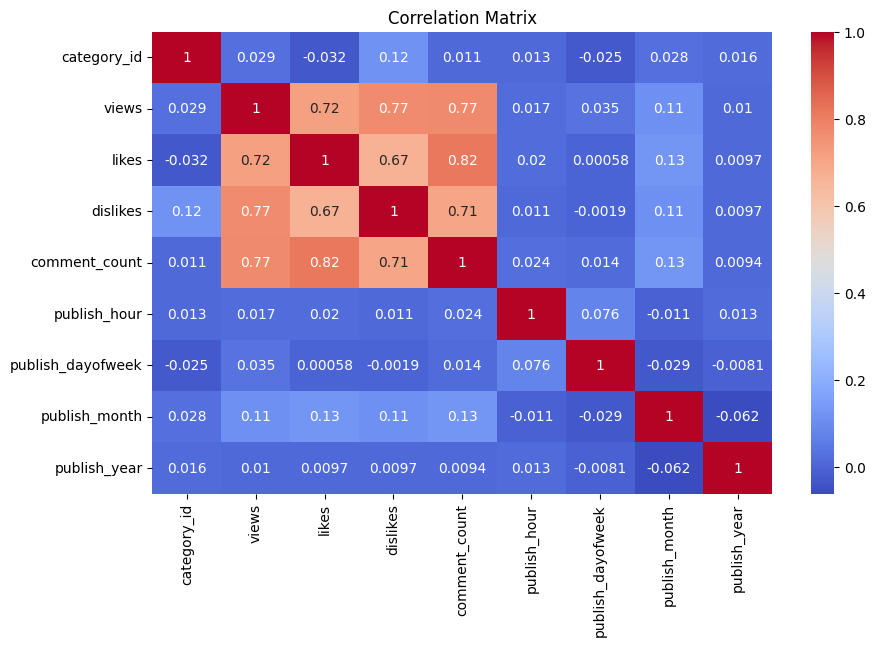

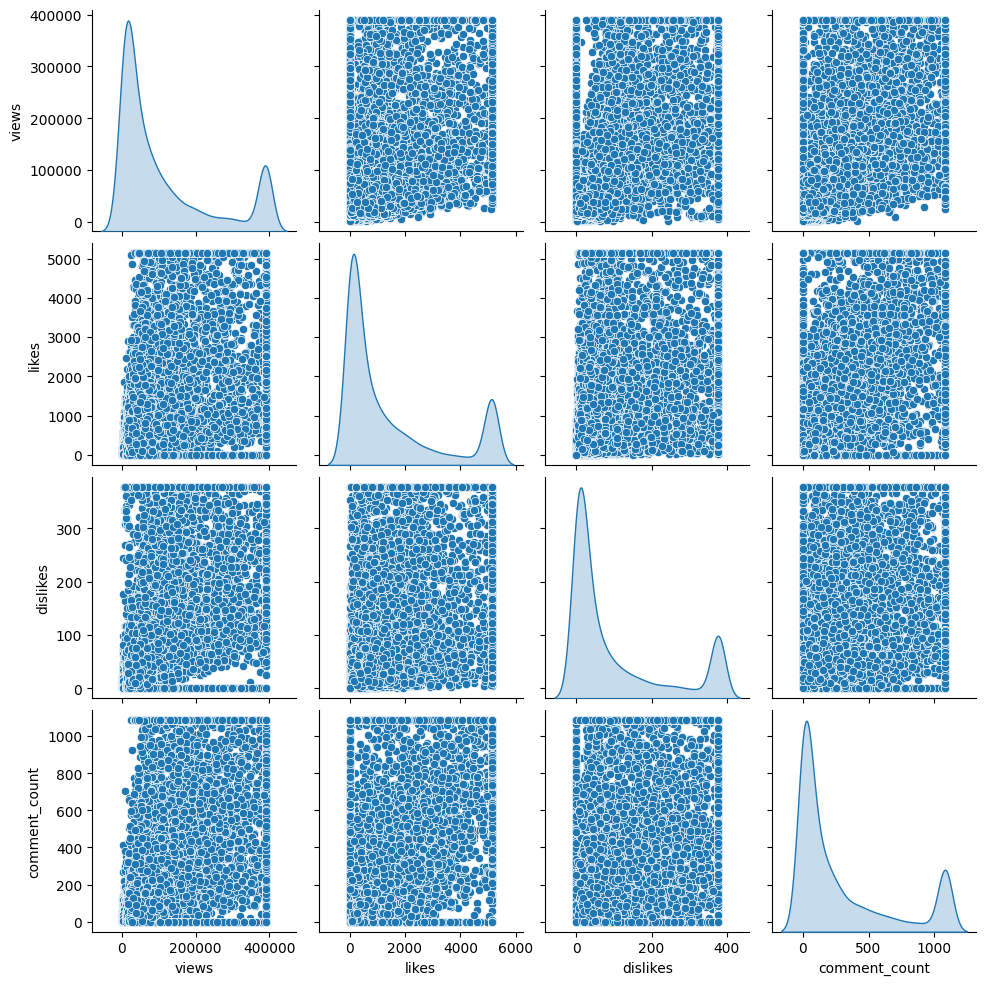


Data Cleaning Process Completed. Cleaned data saved to: /content/JPvideos.csv


In [23]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Try different encodings
try:
    data = pd.read_csv('/content/JPvideos.csv', encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        data = pd.read_csv('/content/JPvideos.csv', encoding='latin-1')  # Try latin-1
    except UnicodeDecodeError:
        data = pd.read_csv('/content/JPvideos.csv', encoding='cp1252')  # Try cp1252


# Data Integrity Check: Display basic information and check for inconsistencies
print("Data Information of JPvideos")
print(data.info())

print("\nData Summary Statistics:")
print(data.describe())

# Missing Data Handling: Display missing values count
print("\nMissing Values Count:")
print(data.isnull().sum())

# Handling missing data
# For this example, we'll fill missing values in numerical columns with the median and in categorical columns with the mode
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Duplicate Removal: Identify and remove duplicate records
print("\nDuplicate Records Count: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Standardization: Ensure consistent formatting and units
data.columns = [col.lower().strip() for col in data.columns]
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Outlier Detection: Identify and handle outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Optionally handle outliers (e.g., remove or cap them)
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Time Analysis: Convert 'publish_time' to datetime and extract relevant parts
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek
data['publish_month'] = data['publish_time'].dt.month
data['publish_year'] = data['publish_time'].dt.year

# Plotting views over time
plt.figure(figsize=(10, 6))
data.groupby('publish_date')['views'].sum().plot()
plt.title('Total Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis: Plotting correlation heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationships
sns.pairplot(data, vars=['views', 'likes', 'dislikes', 'comment_count'], diag_kind='kde')
plt.show()

# Save the cleaned dataset
cleaned_file_path = '/content/JPvideos.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Process Completed. Cleaned data saved to:", cleaned_file_path)